# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
- `balcony` — число балконов; 
- `ceiling_height` — высота потолков (м);
- `city_centers_nearest` — расстояние до центра города (м);
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия); 
- `first_day_exposition` — дата публикации НАДО ИСПРАВИТЬ НА ДАТАФРЕЙМ;
- `floor` — этаж;
- `floors_total` — всего этажей в доме в инт;
- `is_apartment` — апартаменты (НАДО ИСПРАВИТЬ НА булев тип);
- `kitchen_area` — площадь кухни в квадратных метрах (м²);
- `last_price` — цена на момент снятия с публикации;
- `living_area` — жилая площадь в квадратных метрах (м²);
- `locality_name` — название населённого пункта;
- `open_plan` — свободная планировка (булев тип);
- `parks_around_3000` — число парков в радиусе 3 км; 
- `parks_nearest` — расстояние до ближайшего парка (м);
- `ponds_around_3000` — число водоёмов в радиусе 3 км;
- `ponds_nearest` — расстояние до ближайшего водоёма (м);
- `rooms` — число комнат;
- `studio` — квартира-студия (булев тип);
- `total_area` — общая площадь квартиры в квадратных метрах (м²);
- `total_images` — число фотографий квартиры в объявлении; 
- `the_price_of_one_square_meter` - цена одного квадратного метра;
- `week_of_publication` - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- `month_of_publication` - месяц публикации объявления;
- `year_of_publication` - год публикации объявления;
- `floor_type` - тип этажа квартиры (значения — «первый», «последний», «другой»);
- `distance_to_the_center`  - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).


# 1. Откройте файл с данными и изучите общую информацию. 

**1.Загружаем данные из файла в датафрейм.**

In [2]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# открываем файл, исправляя колонки с помощью sep
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
    

**2. Изучаем общую информацию о полученном датафрейме.**

2.1. Выводим первые 10 строчек датафрейма df на экран.

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


2.2. Выведем основную информацию о датафрейме.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

2.3. Узнаем, есть ли в данных пропуски и явные дубликаты. 

In [5]:
# суммарные пропуски
df.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [6]:
# подсчет дубликатов
df.duplicated().sum() 

0

**3. Построим общую гистограмму для всех числовых столбцов таблицы.** 

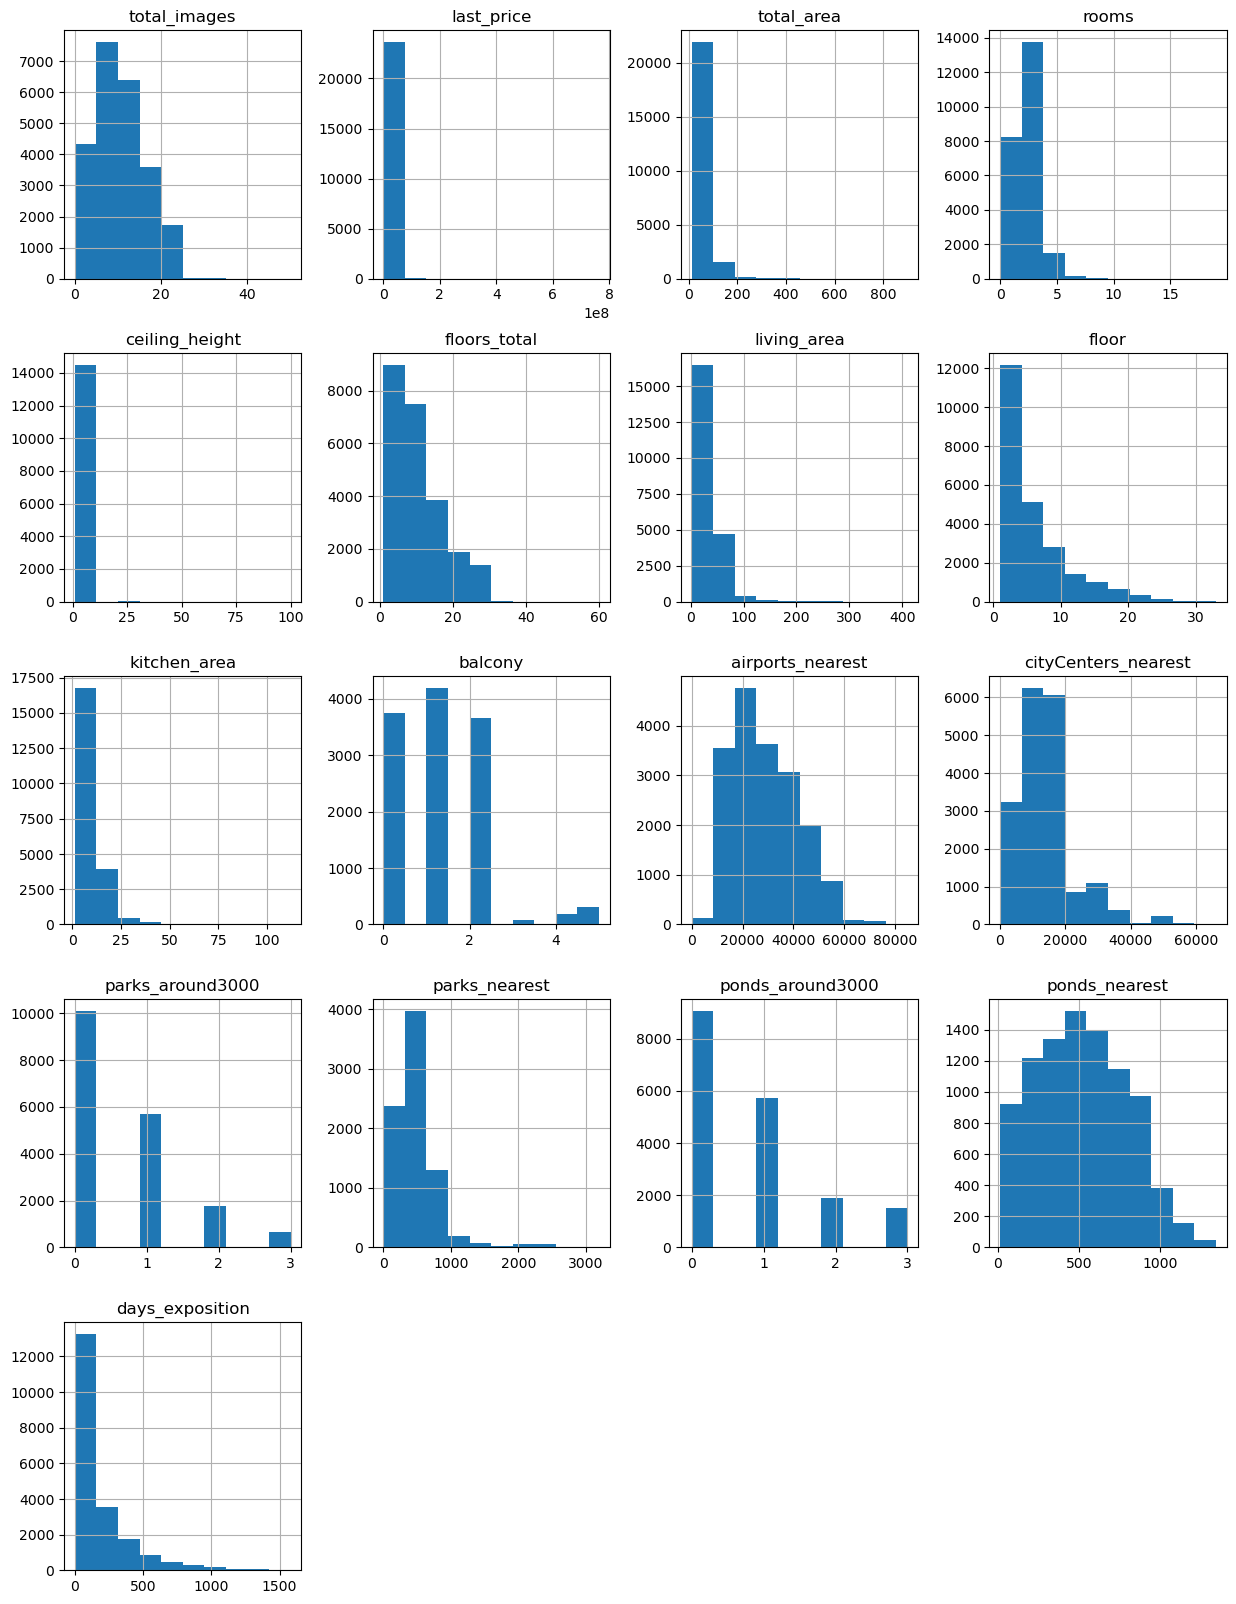

In [7]:
df.hist(figsize=(15, 20));

#  Вывод: 
В ходе изучения общей информации было замечено:
- большое количество пропусков, 
- некорректный тип данных, 
- в столбцах мы замечаем некорректные наименования (parks_around3000, ponds_around3000, cityCenters_nearest),
- судя по гистограмме, можно сделать вывод, что есть аномальные значения.

Данных для исследования объявлений о продаже квартир достаточно.

# 2. Предобработка данных

**1. Исправим некорректные наименования.**

In [8]:
# исправляем
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                        'ponds_around3000': 'ponds_around_3000', 
                        'parks_around3000': 'parks_around_3000'})
# выводим на печать
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**2. Найдём и изучим пропущенные значения в столбцах.**

In [9]:
# суммарные пропуски
df.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around_3000        5518
parks_around_3000        5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Из 22 столбцов в 14 присутствуют пропуски.

Узнаем процент пропусков.

In [10]:
# процент пропуск в колонках
df.isna().mean().sort_values(ascending=False) * 100

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
city_centers_nearest    23.287902
ponds_around_3000       23.283683
parks_around_3000       23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

Поговорим по каждой колонке отдельно.

1) <font color= 'purple'>**is_apartment** </font> - имеет наибольший процент пропусков, здесь содержутся данные об апартаментах. Пропущенные значения, вероятней всего, связаны с отсутсвием апартаментов, поэтому заменим пропущенные значения на False.

In [11]:
# удаляем пропуски в столбце balcony
df['is_apartment'] = df['is_apartment'].fillna(False)


C:\Users\yana7\AppData\Local\Temp\ipykernel_628\1949707931.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_apartment'] = df['is_apartment'].fillna(False)


2) <font color= 'purple'>**parks_nearest** </font> - расстояние до ближайшего парка; так как эти данные, скорее всего, на основе картографических данных, то информация могла быть просто не получена или данные пропущены в связи с сильным отдалением объекта от парка. Эти данные оставим без изменения.

3) <font color= 'purple'>**ponds_nearest** </font> - расстояние до ближайшего водоёма; так как эти данные, скорее всего, на основе картографических данных, то информация могла быть просто не получена или данные пропущены в связи с сильным отдалением объекта от водоёма. Эти данные оставим без изменения.

4) <font color= 'purple'>**balcony** </font> - число балконов; скорее всего, NaN - это отсутствие балкона, так как клиенту не было необходимости указывать количество, если балкона нет. Следовательно, значения NaN мы заменим на 0.

In [12]:
# удаляем пропуски в столбце balcony
df['balcony'] = df['balcony'].fillna(0)


5) <font color= 'purple'>**ceiling_height** </font> - высота потолков; можно заменить пропущенные значения медианным значением потолков (медианное значение не будет содержать тех выбросов, влияющих на результат, которые содержит средняя). 

In [13]:
# удаляем пропуски в столбце ceiling_height
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())


6) <font color= 'purple'>**airports_nearest** </font> - расстояние до ближайшего аэропорта в метрах; так как эти данные, скорее всего, на основе картографических данных, то информация могла быть просто не получена или данные пропущены в связи с сильным отдалением объекта от аэропорта. Эти данные оставим без изменения.

7) <font color= 'purple'>**city_centers_nearest** </font> - расстояние до центра города , так как эти данные, скорее всего, на основе картографических данных, то информация могла быть просто не получена или данные пропущены в связи с сильным отдалением объекта от центра. Эти данные оставим без изменения.

8) <font color= 'purple'>**ponds_around_3000** </font> - число водоёмов в радиусе 3 км. Пропущенные значения, вероятней всего, связаны с отсутсвием водоёмов, поэтому заменим пропущенные значения на 0.

In [14]:
# проверяем распределение значений в столбце ponds_around_3000 для строк, где p_nearest является пропущенным   
df.loc[df['ponds_nearest'].isna()]['ponds_around_3000'].value_counts()

# получили ответ, что все значения равны нулю, значит мы можем заполнить все пропущенные значения нулями.
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(0)

9) <font color= 'purple'>**parks_around_3000** </font> - число парков в радиусе 3 км. Пропущенные значения, вероятней всего, связаны с отсутсвием парков, поэтому заменим пропущенные значения на 0.

In [15]:
# проверяем распределение значений в столбце parks_around_3000 для строк, где parks_nearest является пропущенным   
df.loc[df['parks_nearest'].isna()]['parks_around_3000'].value_counts()

# получили ответ, что все значения равны нулю, значит мы можем заполнить все пропущенные значения нулями.
df['parks_around_3000'] = df['parks_around_3000'].fillna(0) 

10) <font color= 'purple'>**days_exposition** </font> - сколько дней было размещено объявление. Пропущенные значения, вероятней всего, связаны либо с технческой ошибкой, либо с тем, что объявление еще осталось открытым и не было снято. На данный момент оставим данные без изменения.

11) <font color= 'purple'>**kitchen_area** </font> - площадь кухни в квадратных метрах. Пропущенные значения, вероятней всего, связаны с тем, что кухни отдельной нет и она совмещена вместе с гостиной, например. На данный момент оставим данные без изменения.

12) <font color= 'purple'>**living_area** </font> - жилая площадь в квадратных метрах. Пропущенные значения, вероятней всего, связаны с тем, что в основном считается общая площадь (представлена в total_area), жилая площадь может быть простно неизвестна, поэтому там пропуск. На данный момент оставим данные без изменения.

13) <font color= 'purple'>**floors_total** </font> - всего этажей в доме. Это значение тесно связано со значениями в столбце floor. Например, если мы видим 31 этаж в столбце floor, то понимаем, что полная этажность дома не может быть меньше. Заполним пропуски по всей этажности дома медианным значением относительно этажей.


In [15]:
# с помощью цикла заполним пропуски в floors_total по категории floor
for f in df['floor'].unique():
    df.loc[(df['floor'] == f) & (df['floors_total'].isna()), 'floors_total'] = \
    df.loc [(df['floor'] == f), 'floor'].median()


14) <font color= 'purple'>**locality_name** </font> - название населённого пункта. Пропущенных значений в данной колонке небольшое количество (49), на мой взгляд, они не должны сильно повлиять на результаты исследования, поэтому можно их переименовать на unkmown

In [16]:
df['locality_name'] = df['locality_name'].fillna('unkmown')

Выведем количество пропущенных значений для каждого столбца после обработки.

In [17]:
df.isna().sum().sort_values(ascending=False)

parks_nearest           15620
ponds_nearest           14589
airports_nearest         5542
city_centers_nearest     5519
days_exposition          3181
kitchen_area             2278
living_area              1903
ponds_around_3000           0
parks_around_3000           0
locality_name               0
balcony                     0
total_images                0
last_price                  0
studio                      0
is_apartment                0
floor                       0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

В процессе поиска пропущенных значений были замечены случайные пропуски, пропуски, связанные с человеческим фактором, технические ошибки. Некоторые пропуски удалось уменьшить. 

**3. Исправим некорректные типы значений.**

In [18]:
# методом pd.to_datetime() переведем значения столбца first_day_exposition  в таблице df в объекты datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


In [19]:
# переведем столбец is_apartment в булев тип
df['is_apartment'] = df['is_apartment'].astype('bool')


In [20]:
# переведем столбец balcony в целочисленный тип
df['balcony'] = df['balcony'].astype('int')

In [21]:
# переведем столбец ponds_around_3000 в целочисленный тип
df['ponds_around_3000'] = df['ponds_around_3000'].astype('Int64')

In [22]:
# переведем столбец parks_around_3000 в целочисленный тип
df['parks_around_3000'] = df['parks_around_3000'].astype('Int64')

In [23]:
# переведем столбец last_price в целочисленный тип
df['last_price'] = df['last_price'].astype('float64')

In [24]:
# переведем столбец floors_total в целочисленный тип
df['floors_total'] = df['floors_total'].astype('Int64')

In [25]:
# переведем столбец days_exposition в целочисленный тип
#df['days_exposition'] = df['days_exposition'].astype('Int64')

In [26]:
# узнаем тип значений в колонках
df.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     Int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000                Int64
parks_nearest                  float64
ponds_around_3000                Int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

В столбцах таблицы были изменины типы данных в соответствии с данными, находяшимися в столбцах. Так для столбца:
* first_day_exposition, который содержит время, подходящий тип данных to_datetime
* is_apartment содержит значения False и True, здесь подходящий тип данных bool
* balcony, ponds_around_3000, parks_around_3000, last_price содержит целые числа, здесь подходящий тип данных int

**4. Устраняем неявные дубликаты.**

Неявные дубликаты находятся в столбце locality_name. Посмотрим на них.

In [27]:
# выведем данные в алфавитном порядке
df['locality_name'].sort_values().unique()

array(['unkmown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'город

В глаза бросается огромное количество разных населенных пунктов, которые как раз и повторяются, например, «поселок N», «поселок городского типа N», "городской посёлок N", «поселок» и «посёлок». 

Предлагаю, устранить неявные дубликаты одних и тех же населённых пунктов, оставив только название.

In [28]:
# переименуем типы населённых пунктов в пустоту, не забудем включить пробел, иначе названия останутся с пробелами
df['locality_name'] = df['locality_name'].replace(['посёлок ', 'городской ', 'деревня ', 'коттеджный ', 'поселок ',
             'садовое товарищество ', 'садоводческое некоммерческое ', 'село ', 'пансионат ', 'городского типа ',
             'при железнодорожной ', 'станции ', 'товарищество '], '', regex=True)

# выведем данные в алфавитном порядке
df['locality_name'].sort_values().unique()

array(['unkmown', 'Агалатово', 'Александровская', 'Алексеевка', 'Аннино',
       'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород

Таким образом, мы избавились от неявных дубликатов, оставив название только в одном экземпляре.

**5. Обработка аномальных значений.**

С помощью sort_values().unique() посмотрела на данные в каждом столбце. 
Смутило следующее:
* **ceiling_height** - высота потолка: там есть значения потолков 25 м и 32 м, логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м, а также встечается высота потолков больше 5 м и меньше 2,5 м, что странно, потолки меньше 2,5 м запрещены по правилам (СНиП), 
* **total_area** - квартиры встречаются 900 м2, нужно посмотреть на них,
* **rooms** - 19 комнат тоже неправдоподобно много, 
* **floors_total** - встречаются дома, где этажей больше 50, 
* **kitchen_area** - есть значения даже больше 100 м2, возможно, эти значения перепутали с общей площадью, например, 
* **balcony** - встречается 5 балконов, хотя если это 19 комнатная квартира, то все может быть,

Попробуем исправить аномальные значения, которые могут сильно повлиять на выборку.

<font color= 'purple'> **ceiling_height**

In [29]:
# используем loc для замены значений: выберем только те потолки, высота которых больше 20 и передадим им новое значение
df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] = df['ceiling_height']/10 

# оставим в столбце ceiling_height значения потолков только от 2.5 до 5 м
df['ceiling_height'] = df['ceiling_height'].loc[(df['ceiling_height'] <= 5.0) & (df['ceiling_height'] >= 2.5)]

# выведем результат
df['ceiling_height'].sort_values().unique()

array([2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 ,
       2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71,
       2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82,
       2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93,
       2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03, 3.04,
       3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15,
       3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27,
       3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38,
       3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 ,
       3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.62,
       3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 ,
       3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 , 3.93, 3.95, 3.98,
       4.  , 4.06, 4.1 , 4.14, 4.15, 4.19, 4.2 , 4.25, 4.3 , 4.37, 4.4 ,
       4.45, 4.5 , 4.65, 4.7 , 4.8 , 4.9 , 5.  ,  n

<div class="alert alert-success">

**Артём:** 👍 Верно.

<font color= 'purple'> **total_area**

In [30]:
# проверим сколько имеем квартир площадью больше 200 м2
df[df['total_area'] > 200]

# встречаем 227 квартир, на мой взгляд, 
# их оставлять нецелесообразно, так как они сильно изменяют значение выборки
# оставим в столбце total_area значения площади только до 200 м2
df['total_area'] = df['total_area'].loc[df['total_area'] < 200]

# выведем результат
df['total_area'].sort_values().unique()

array([ 12. ,  13. ,  13.2, ..., 198.9, 199.2,   nan])

<font color= 'purple'> **rooms**

In [31]:
# проверим сколько имеем квартир, где больше 7 комнат  
df[df['rooms'] > 7]

# встречаем 31 квартира, на мой взгляд, 
# их оставлять нецелесообразно, так как они сильно изменяют значение выборки
# оставим в столбце rooms значения квартир, где меньше 7 комнат
df['rooms'] = df['rooms'].loc[df['rooms'] < 7]

# выведем результат
df['rooms'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6., nan])

<font color= 'purple'> **floors_total**

In [32]:
# проверим сколько имеем квартир, где больше 30 этажей  
df[df['floors_total'] > 30]

# встречаем 32 квартир, на мой взгляд, 
# их оставлять нецелесообразно, так как они сильно изменяют значение выборки
# оставим в столбце floors_total значения квартир, где меньше 30 этажей
df['floors_total'] = df['floors_total'].loc[df['floors_total'] < 30]

# выведем результат
df['floors_total'].sort_values().unique()

<IntegerArray>
[   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,   12,   13,
   14,   15,   16,   17,   18,   19,   20,   21,   22,   23,   24,   25,   26,
   27,   28,   29, <NA>]
Length: 30, dtype: Int64

<font color= 'purple'> **kitchen_area**

In [33]:
# проверим сколько имеем квартир, где кухня больше 30м2 
df[df['kitchen_area'] > 30]

# встречаем 323 квартиры, на мой взгляд, 
# их оставлять нецелесообразно, так как они сильно изменяют значение выборки
# оставим в столбце kitchen_area значения квартир, где кухня меньше 30м2
df['kitchen_area'] = df['kitchen_area'].loc[df['kitchen_area'] < 30]

# выведем результат
df['kitchen_area'].sort_values().unique()

array([ 1.3 ,  2.  ,  2.3 ,  2.4 ,  2.89,  3.  ,  3.2 ,  3.3 ,  3.4 ,
        3.5 ,  3.7 ,  3.8 ,  4.  ,  4.1 ,  4.2 ,  4.3 ,  4.4 ,  4.5 ,
        4.6 ,  4.7 ,  4.8 ,  4.9 ,  5.  ,  5.04,  5.06,  5.1 ,  5.14,
        5.2 ,  5.21,  5.23,  5.25,  5.28,  5.29,  5.3 ,  5.31,  5.33,
        5.35,  5.4 ,  5.42,  5.44,  5.47,  5.49,  5.5 ,  5.53,  5.59,
        5.6 ,  5.61,  5.62,  5.64,  5.65,  5.68,  5.7 ,  5.74,  5.75,
        5.78,  5.8 ,  5.82,  5.85,  5.86,  5.9 ,  5.91,  6.  ,  6.02,
        6.03,  6.1 ,  6.16,  6.19,  6.2 ,  6.22,  6.23,  6.24,  6.25,
        6.26,  6.27,  6.28,  6.3 ,  6.31,  6.33,  6.35,  6.36,  6.37,
        6.4 ,  6.47,  6.5 ,  6.55,  6.58,  6.6 ,  6.61,  6.62,  6.65,
        6.7 ,  6.72,  6.73,  6.76,  6.77,  6.8 ,  6.82,  6.83,  6.84,
        6.86,  6.9 ,  6.91,  6.93,  6.95,  7.  ,  7.02,  7.03,  7.06,
        7.09,  7.1 ,  7.12,  7.15,  7.17,  7.18,  7.19,  7.2 ,  7.3 ,
        7.36,  7.4 ,  7.41,  7.48,  7.5 ,  7.54,  7.6 ,  7.63,  7.65,
        7.7 ,  7.71,

<font color= 'purple'> **balcony**

In [34]:
# проверим сколько имеем квартир, где больше 3 балконов 
df[df['balcony'] > 3]

# встречаем 487 квартиры, на мой взгляд, 
# их оставлять нецелесообразно, так как они сильно изменяют значение выборки
# оставим в столбце balcony значения квартир, где меньше 3 балконов
df['balcony'] = df['balcony'].loc[df['balcony'] < 3]

# выведем результат
df['balcony'].sort_values().unique()

array([ 0.,  1.,  2., nan])

Таким образом, нам удалось обработать аномалии в столбцах таблицы. Если природа аномалии была понятна и данные действительно искажены, то мы восстанавливали корректное значение. В ином случае убирали из выборки редкие и выбивающиеся значения.


<font color= 'purple'> **last_price**

In [35]:
# проверим сколько имеем квартир стоимостью больше 20000000 и меньше 1000000
df[df['last_price'] > 20000000]
df[df['last_price'] < 1000000]

# встречаем 707 квартиры и 225 квартир, на мой взгляд, 
# их оставлять нецелесообразно, так как они сильно изменяют значение выборки
# оставим в столбце last_price значения квартир, стоимостью от 1000000 до 20000000 
df['last_price'] = df['last_price'].loc[(df['last_price'] < 20000000) & (df['last_price'] > 1000000)]

# выведем результат
df['last_price'].sort_values().unique()

array([ 1010000.,  1020000.,  1030000., ..., 19990000., 19999000.,
             nan])

#  Вывод: 

В процессе предобработки данных удалось:

Переименовать название столбцов, приведя имена к единому стилю.
Заполнить пропуски в таблице.
Изменить тип данных в соответствии с данными, находяшимися в столбцах.
Обработать явные и неявные дубликаты.

# 3. Посчитайте и добавьте в таблицу новые столбцы

Добавим столбец <font color= 'purple'> **the_price_of_one_square_meter** </font> - цена одного квадратного метра.

In [36]:
# добавим столбец и округлим значение
df['the_price_of_one_square_meter'] = (df['last_price']/df['total_area'])
# выедим новый столбец
df['the_price_of_one_square_meter']

0        120370.370370
1         82920.792079
2         92785.714286
3                  NaN
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: the_price_of_one_square_meter, Length: 23699, dtype: float64

Добавим столбец <font color= 'purple'> **week_of_publication** </font> - день недели публикации объявления.

In [37]:
# добавим столбец
df['week_of_publication'] = df['first_day_exposition'].dt.weekday
# выведим уникальные значения
df['week_of_publication']. unique()

array([3, 1, 4, 0, 2, 6, 5])

Добавим столбец <font color= 'purple'> **month_of_publication** </font> - месяц публикации объявления.

In [38]:
# добавим столбец
df['month_of_publication'] = df['first_day_exposition'].dt.month
# выведим уникальные значения
df['month_of_publication']. unique()

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10])

Добавим столбец <font color= 'purple'> **year_of_publication** </font> - год публикации объявления.

In [39]:
# добавим столбец
df['year_of_publication'] = df['first_day_exposition'].dt.year
# выведим уникальные значения
df['year_of_publication']. unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

Добавим столбец <font color= 'purple'> **floor_type** </font> - тип этажа квартиры. 

In [40]:
# создадим функцию для типа этажа
def floor_category(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        pass
# добавим столбец    
df['floor_type'] = df.apply(floor_category, axis=1)

# выведим уникальные значения
df['floor_type']. unique()

array(['другой', 'первый', 'последний', None], dtype=object)

Добавим столбец <font color= 'purple'> **distance_to_the_center** </font> - расстояние до центра города в километрах. 

In [41]:
# добавим столбец и округлим значение
df['distance_to_the_center'] = (df['city_centers_nearest']/1000).round(0)
# выведим уникальные значения
df['distance_to_the_center']. unique()

array([16., 19., 14.,  7.,  8., nan, 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25.,  0., 66., 47., 40., 57., 37., 41., 43., 48.,
       62., 60., 39., 42., 65., 54., 59., 45., 61., 63.])

# 4. Проведите исследовательский анализ данных

**1. Изучим следующие параметры объектов:** 

Анализируем <font color= 'purple'> **общую площадь** - 'total_area'

In [42]:
# получим характеристики, дающие представление о выборке
df['total_area'].describe()

count    23468.000000
mean        58.155629
std         26.469479
min         12.000000
25%         40.000000
50%         51.900000
75%         68.900000
max        199.200000
Name: total_area, dtype: float64

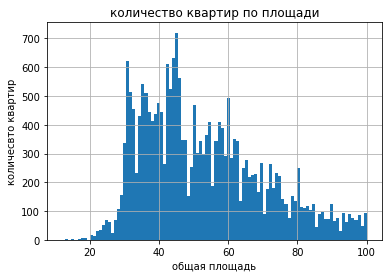

In [43]:
# построим гистограмму
#df['total_area'].hist(bins=100)

# т.к, значения до 12 и после 100 малочислены, предлагаю построить гистограмму в диапазоне от 12 до 100
df['total_area'].hist(bins=100, range = (12,100))
# установка заголовка графика
plt.title('количество квартир по площади')
# добавление подписей осей
plt.xlabel('общая площадь')
plt.ylabel('количесвто квартир')
# показ графика
plt.show()

Большее количество квартир в таблице представлено по площади от 30 до 60м2. 
Одни из самых популярных площадей - это площадь около 45 м2.
Квартиры до 20 м2 и больше 100 м2 наименее популярные.

Анализируем <font color= 'purple'> **жилую площадь** - 'living_area'

In [44]:
# получим характеристики, дающие представление о выборке
df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

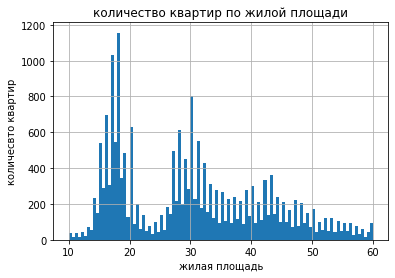

In [45]:
# построим гистограмму
#df['living_area'].hist(bins=100)

# т.к, значения до 10 и после 60 малочислены, предлагаю построить гистограмму в диапазоне от 10 до 60
df['living_area'].hist(bins=100, range = (10,60))
# установка заголовка графика
plt.title('количество квартир по жилой площади')
# добавление подписей осей
plt.xlabel('жилая площадь')
plt.ylabel('количесвто квартир')
# показ графика
plt.show()

Большее количество квартир в таблице представлено по жилой площади 18 м2, далее следуют квартиры площадью 17 и 30 м2. 
Квартиры до 14 м2, от 21 до 26 м2 и больше 50 м2 наименее популярные.

Анализируем <font color= 'purple'> **площадь кухни** - 'kitchen_area'

In [46]:
# получим характеристики, дающие представление о выборке
df['kitchen_area'].describe()

count    21038.000000
mean        10.030989
std          4.065017
min          1.300000
25%          7.000000
50%          9.000000
75%         11.707500
max         29.900000
Name: kitchen_area, dtype: float64

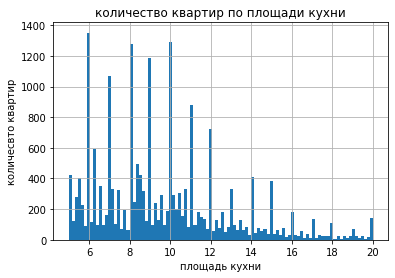

In [47]:
# построим гистограмму
#df['kitchen_area'].hist(bins=100)

# т.к, значения до 5 и после 20 малочислены, предлагаю построить гистограмму в диапазоне от 5 до 20
df['kitchen_area'].hist(bins=100, range = (5,20))
# установка заголовка графика
plt.title('количество квартир по площади кухни')
# добавление подписей осей
plt.xlabel('площадь кухни')
plt.ylabel('количесвто квартир')
# показ графика
plt.show()

На графике мы видим, что большей популярностью обладают кухни площадью 6 м2, 8 м2, 10 м2, далее идут кухни 7 и 9 м2.
Наименее популярными являются площади до 6 м2 и после 12 м2. На графике мы видим явные всплески в определенных площадях. Это может быть связано с тем, что есть стандартные значения площади кухни, в которые как раз и попадает наибольшее количество.

Анализируем <font color= 'purple'> **цена объекта** - 'last_price'

In [48]:
# получим характеристики, дающие представление о выборке
df['last_price'].describe()

count    2.273100e+04
mean     5.463320e+06
std      3.178891e+06
min      1.010000e+06
25%      3.405000e+06
50%      4.600000e+06
75%      6.500000e+06
max      1.999900e+07
Name: last_price, dtype: float64

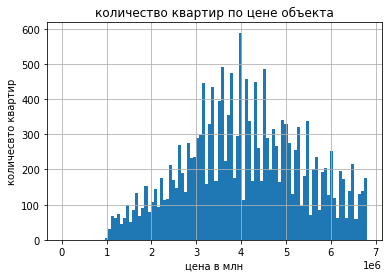

In [49]:
# построим гистограмму
#df['last_price'].hist(bins=100, range=(1.219000e+04,7.630000e+08))

# т.к, значения после 12 млн малочислены, предлагаю построить гистограмму в диапазоне от min до 7 млн
df['last_price'].hist(bins=100, range = (1.219000e+04,6.800000e+06))
# установка заголовка графика
plt.title('количество квартир по цене объекта')
# добавление подписей осей
plt.xlabel('цена в млн')
plt.ylabel('количесвто квартир')
# показ графика
plt.show()

Самый популярные цены на квартиры находятся в диапазоне от 3 млн. до 5,5 млн. Квартиры до 1 млн. и после 7 млн. самые непопулярные, скорее всего, из-за того, что дешёвые квартиры не выгодны для продавца, а слишком дорогие - для покупателя.

Анализируем <font color= 'purple'> **количество комнат** - 'rooms'

In [50]:
# получим характеристики, дающие представление о выборке
df['rooms'].describe()

count    23609.000000
mean         2.047905
std          1.006772
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

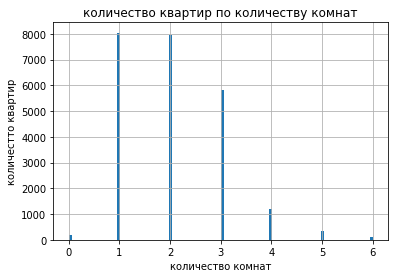

In [51]:
# построим гистограмму
df['rooms'].hist(bins=100)
# установка заголовка графика
plt.title('количество квартир по количеству комнат')
# добавление подписей осей
plt.xlabel('количество комнат')
plt.ylabel('количестто квартир')
# показ графика
plt.show()

Видим линейное снижение: самое большое количество квартир однокомнатные, дальше идут двухкомнатные, -трёх, -четырёхкомнатные. Ну а квартир с 5 и 6 комнатами совсем мало.

Анализируем <font color= 'purple'> **высота потолка** - 'ceiling_height' 

In [52]:
# получим характеристики, дающие представление о выборке
df['ceiling_height'].describe()

count    23609.000000
mean         2.697127
std          0.214991
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

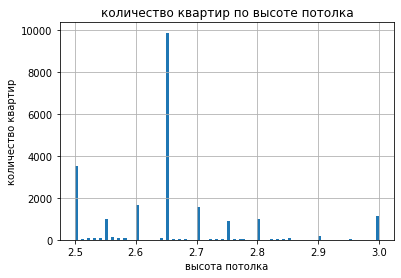

In [53]:
# построим гистограмму
#df['ceiling_height'].hist(bins=100)

# т.к, значения до 2.5 и после 3  малочислены, предлагаю построить гистограмму в диапазоне от 2.5 до 3 
df['ceiling_height'].hist(bins=100, range = (2.5, 3))
# установка заголовка графика
plt.title('количество квартир по высоте потолка')
# добавление подписей осей
plt.xlabel('высота потолка')
plt.ylabel('количество квартир')
# показ графика
plt.show()

Самое большое количество квартир с высотой потолков 2.65 и 2.5. Далее идут потолки высотой 2.7 м, 2.6 м, 2.8 и 3.0 м, но их уже не так много.

Анализируем <font color= 'purple'> **этаж квартиры** - 'floor'

In [54]:
# получим характеристики, дающие представление о выборке
df['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

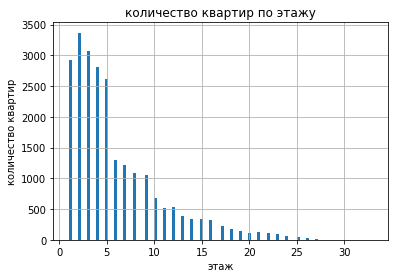

In [55]:
# построим гистограмму
df['floor'].hist(bins=100)
# установка заголовка графика
plt.title('количество квартир по этажу')
# добавление подписей осей
plt.xlabel('этаж')
plt.ylabel('количество квартир')
# показ графика
plt.show()

Видим линейное снижение: больше всего квартир выбирают на 2 этаже, дальше идет по убывающей. Квартиры на 1 этаже тоже имют спрос, но меньше чем на 2 и 3. Этажи после 5 менее популярные.

Анализируем <font color= 'purple'> **тип этажа квартиры** - 'floor_type'

In [56]:
# получим характеристики, дающие представление о выборке
df['floor_type'].describe()

count      23667
unique         3
top       другой
freq       17331
Name: floor_type, dtype: object

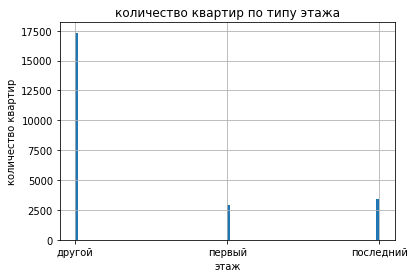

In [57]:
# построим гистограмму
df['floor_type'].hist(bins=100)
# установка заголовка графика
plt.title('количество квартир по типу этажа')
# добавление подписей осей
plt.xlabel('этаж')
plt.ylabel('количество квартир')
# показ графика
plt.show()

Первый и последний этажи имеют наименьшее количество квартир в отличии от других этажей.

Анализируем <font color= 'purple'> **общее количество этажей в доме** - 'floors_total'

In [58]:
# получим характеристики, дающие представление о выборке
df['floors_total'].describe()

count    23667.000000
mean        10.636709
std          6.529343
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

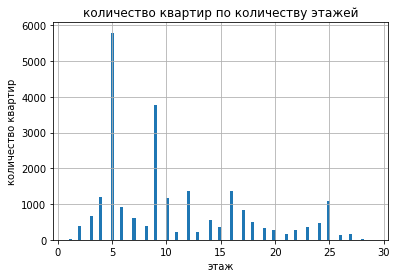

In [59]:
# построим гистограмму
df['floors_total'].hist(bins=100)
# установка заголовка графика
plt.title('количество квартир по количеству этажей')
# добавление подписей осей
plt.xlabel('этаж')
plt.ylabel('количество квартир')
# показ графика
plt.show()

Больше всего квартир, где общее количество этажей составляет 5 и 9 этажей. Остальные варианты представлены реже.

Анализируем <font color= 'purple'> **расстояние до центра города в метрах** - 'city_centers_nearest'

In [60]:
# получим характеристики, дающие представление о выборке
df['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

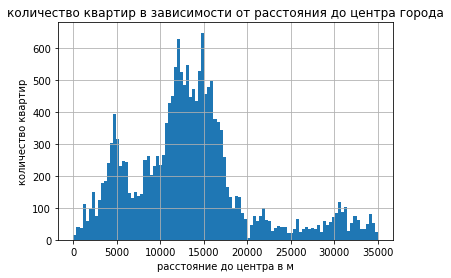

In [61]:
# построим гистограмму
#df['city_centers_nearest'].hist(bins=100)

# т.к, значения после 35000  малочислены, предлагаю построить гистограмму в диапазоне до 35000 
df['city_centers_nearest'].hist(bins=100, range = (0, 35000))
# установка заголовка графика
plt.title('количество квартир в зависимости от расстояния до центра города')
# добавление подписей осей
plt.xlabel('расстояние до центра в м')
plt.ylabel('количество квартир')
# показ графика
plt.show()

Самый большой всплеск находится в диапазоне от 12000 до 16000 метров от центра, вероятно, это какие-то отдаленные от центра  спальные районы, но в черте города. Еще один всплеск, пусть и меньше, наблюдаем в диапазоне 5000 м.

Анализируем <font color= 'purple'> **расстояние до ближайшего аэропорта** - 'airports_nearest'

In [62]:
# получим характеристики, дающие представление о выборке
df['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

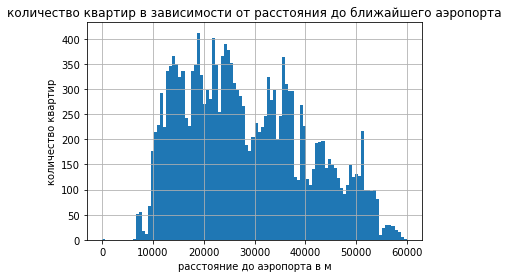

In [63]:
# построим гистограмму
#df['airports_nearest'].hist(bins=100)

# т.к, значения после 60000  малочислены, предлагаю построить гистограмму в диапазоне до 60000 
df['airports_nearest'].hist(bins=100, range = (0, 60000))
# установка заголовка графика
plt.title('количество квартир в зависимости от расстояния до ближайшего аэропорта')
# добавление подписей осей
plt.xlabel('расстояние до аэропорта в м')
plt.ylabel('количество квартир')
# показ графика
plt.show()

Большее количество квартир находится от аэропорта в 15000-25000 м. Еще один всплеск встречается на расстоянии в 35000 м.

Анализируем <font color= 'purple'> **расстояние до ближайшего парка** - 'parks_nearest'

In [64]:
# получим характеристики, дающие представление о выборке
df['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

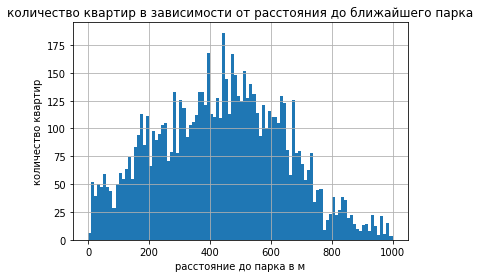

In [65]:
# построим гистограмму
#df['parks_nearest'].hist(bins=100)

# т.к, значения после 1000  малочислены, предлагаю построить гистограмму в диапазоне до 1000 
df['parks_nearest'].hist(bins=100, range = (0, 1000))
# установка заголовка графика
plt.title('количество квартир в зависимости от расстояния до ближайшего парка')
# добавление подписей осей
plt.xlabel('расстояние до парка в м')
plt.ylabel('количество квартир')
# показ графика
plt.show()

В целом количество квартир не сильно зависит от удаленности парка. Самое большое количество квартир находится в диапазоне от 400 до 600 м.  

Анализируем <font color= 'purple'> **день и месяц публикации объявления** - 'week_of_publication' и 'month_of_publication'

In [66]:
# получим характеристики, дающие представление о выборке
df['week_of_publication'].describe()

count    23699.000000
mean         2.569307
std          1.789082
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: week_of_publication, dtype: float64

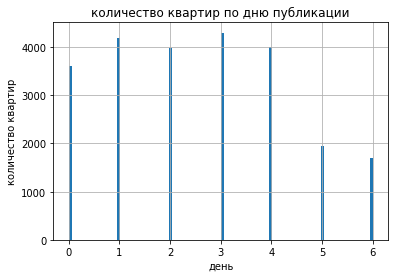

In [67]:
# построим гистограмму
df['week_of_publication'].hist(bins=100)
# установка заголовка графика
plt.title('количество квартир по дню публикации')
# добавление подписей осей
plt.xlabel('день')
plt.ylabel('количество квартир')
# показ графика
plt.show()

Больше всего объявлений квартир было размещено в буднии дни. В выходные размещали реже.

In [68]:
# получим характеристики, дающие представление о выборке
df['month_of_publication'].describe()

count    23699.000000
mean         6.400101
std          3.491561
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_of_publication, dtype: float64

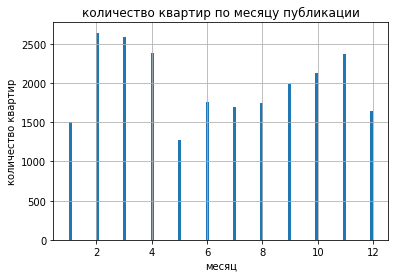

In [69]:
# построим гистограмму
df['month_of_publication'].hist(bins=100)
# установка заголовка графика
plt.title('количество квартир по месяцу публикации')
# добавление подписей осей
plt.xlabel('месяц')
plt.ylabel('количество квартир')
# показ графика
plt.show()

Больше всего объявлений квартир было в феврале, марте, апреле, ноябре. Меньше всего в январе, мае, летом и в декабре. Это, скорее всего, связано с праздничными выходными, отдыхом, отпуском.

**Вывод:** 

Если мы соберем все результаты в один, то обнаружим зависимость количества квартир от: 
- площади. Самые популярные  площади: общая площадь около 45 м2, жилая площадь 18 м2, кухня площадью 6, 8, 10 м2.

- цены. Самая популярная стоимость на квартиры находится в диапазоне от 3 млн. до 5,5 млн. 

- количества комнат. Самые популярные квартиры однокомнатные и двухкомнатные.

- высоты потолков. Больше всего квартир с потолками 2.65 и 2.5 м. 

- этажности дома. Больше всего квартир выбирают на 2 этаже, предпочитают этажи в середине, а не первый и последний, предпочтительнее оказываются пятиэтажки и девятиэтажки. 

- расстояния. Популярное расстояние от центра находится в диапазоне от 12000 до 16000 метров, от аэропорта в 15000-25000 м, от парка в 400-600 м. 

- времени публикации. Больше всего объявлений квартир было размещено в буднии дни и в феврале, марте, апреле, ноябре.

**2. Изучим как быстро продавались квартиры :** 

In [70]:
# получим характеристики, дающие представление о выборке
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

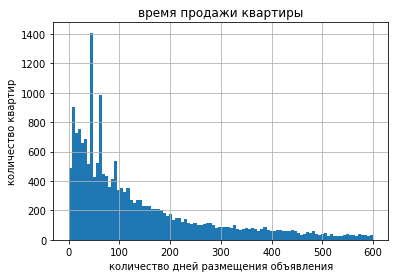

In [71]:
# построим гистограмму
#df['days_exposition'].hist(bins=100)

# т.к, значения после 600  малочислены, предлагаю построить гистограмму в диапазоне до 600 
df['days_exposition'].hist(bins=100, range = (0, 600))
# установка заголовка графика
plt.title('время продажи квартиры')
# добавление подписей осей
plt.xlabel('количество дней размещения объявления')
plt.ylabel('количество квартир')
# показ графика
plt.show()

**Вывод:** 

На графики заметно, что большее количество объявлений висело меньше 100 дней (2-3 месяца), значит обычно большая часть квартир успевала уходить на продаважу в течение этого времени. 

Быстрыми продажами можно считать те объявления, которые висели около 45 дней (первый квартиль), а долгими более 232 дней (третий квартиль).

Среднее время продажи составляет 180 дня, а медианное значение составляет 95 дня. Стандартное отклонение превышает среднее значение - это говорит о большом количестве выбросов. На мой взгляд, лучше обращаться именно к медианному значению, так как оно меньше зависит от выбросов и странных значений, а следовательно, более точно характеризует время продажи.

Так же можно включить в рассуждение причины быстрой и медленной продажи: вероятнее всего, время продажи могло зависеть от разных факторов, в том числе от тех, о которых мы говорили выше.


**3. Изучим, какие факторы больше всего влияют на общую стоимость объекта:**

1. С помощью вычисления корреляции Пирсона выясним зависимость общей стоимости объекта от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

2. Построим графики, которые покажут зависимость цены от указанных параметров. 

<font color= 'purple'> **общая площадь**

In [72]:
# получим характеристики, дающие представление о выборке, по нужным столбцам
df['last_price'].corr(df['total_area'])

0.7758494400631866

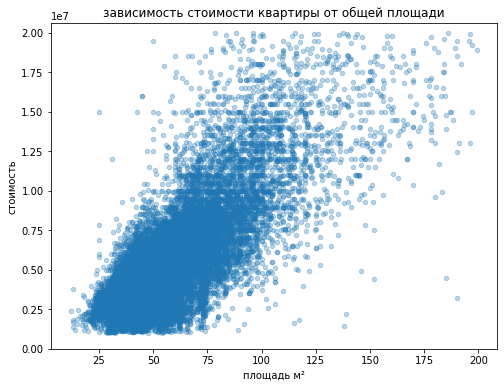

In [73]:
# посмотрим на график
df.plot(x='total_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.3)
# установка заголовка графика
plt.title('зависимость стоимости квартиры от общей площади')
# добавление подписей осей
plt.xlabel('площадь м²')
plt.ylabel('стоимость')
# установка диапазона оси у
plt.ylim (0, 20.630000e+06)
# показ графика
plt.show()


Корреляция в 0.77 говорит о наличии связи между стоимостью и площадью.
На графики наблюдается прямая зависимость: чем больше площадь, тем больше цена. Здесь положительная корреляция. 

<font color= 'purple'> **жилая площадь**

In [74]:
# получим характеристики, дающие представление о выборке, по нужным столбцам
df['last_price'].corr(df['living_area'])

0.670968138060738

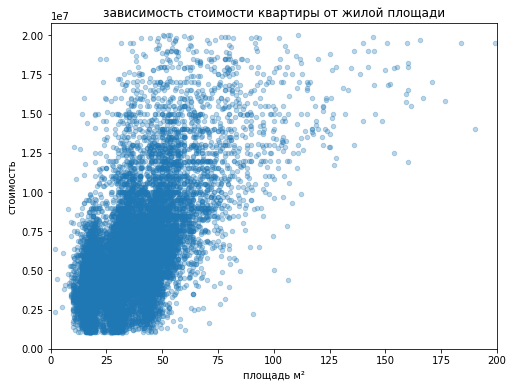

In [75]:
# посмотрим на график
df.plot(x='living_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.3)
# установка заголовка графика
plt.title('зависимость стоимости квартиры от жилой площади')
# добавление подписей осей
plt.xlabel('площадь м²')
plt.ylabel('стоимость')
# установка диапазона оси х и у
plt.xlim (0, 200)
plt.ylim (0, 20.800000e+06)
# показ графика
plt.show()


Корреляция в 0.66 говорит о наличии связи, однако не слишком сильной. 
График показывает, что в целом увеличение жилой площади сопровождается с прибавкой в стоимости, но так бывает не всегда. 

<font color= 'purple'> **площадь кухни**

In [76]:
# получим характеристики, дающие представление о выборке, по нужным столбцам
df['last_price'].corr(df['kitchen_area'])

0.5588758189359454

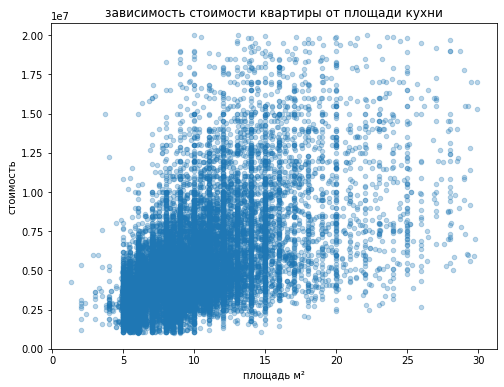

In [77]:
# посмотрим на график
df.plot(x='kitchen_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.3)
# установка заголовка графика
plt.title('зависимость стоимости квартиры от площади кухни')
# добавление подписей осей
plt.xlabel('площадь м²')
plt.ylabel('стоимость')
# установка диапазона оси у
plt.ylim (0, 20.800000e+06)
# показ графика
plt.show()


Корреляция 0.56 говорит о слабой связи. График подтвержадет это. Стоимость слабо зависит от площади кухни.

<font color= 'purple'> **количество комнат**

In [78]:
# получим характеристики, дающие представление о выборке, по нужным столбцам
df['last_price'].corr(df['rooms'])

0.5053148332102405

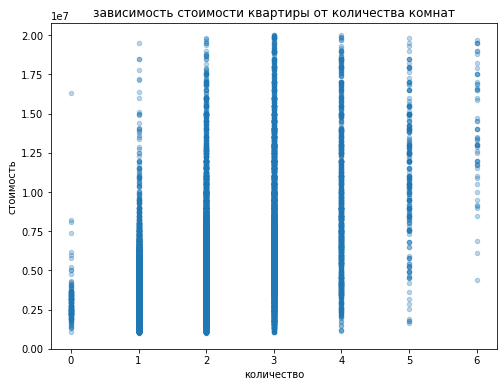

In [79]:
# посмотрим на график
df.plot(x='rooms', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True, alpha = 0.3)
# установка заголовка графика
plt.title('зависимость стоимости квартиры от количества комнат')
# добавление подписей осей
plt.xlabel('количество')
plt.ylabel('стоимость')
# установка диапазона оси у
plt.ylim (0, 20.800000e+06)
# показ графика
plt.show()


По данному графику не очень понятна корреляция. Построим сводную таблицу, которая будет отображать количество комнат по стоимости. Передим параметру values значение 'last_price', в aggfunc добавим медианное значение, которое не будет содержать выбросов, влияющих на результат. Из данных сводной таблицы построим график зависимости между стоимостью и количеством комнат.

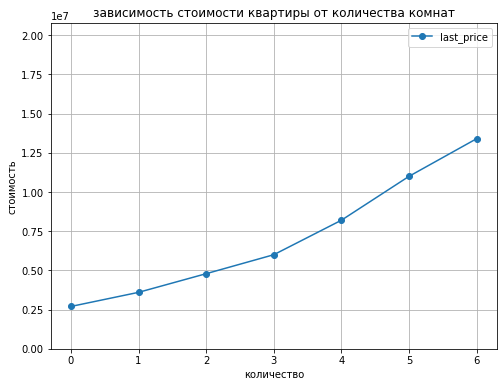

In [80]:
(
    df.pivot_table(index='rooms', values='last_price', aggfunc='median')
      .plot(grid=True, figsize=(8, 6), style='o-')
)
# установка заголовка графика
plt.title('зависимость стоимости квартиры от количества комнат')
# добавление подписей осей
plt.xlabel('количество')
plt.ylabel('стоимость')
# установка диапазона оси у
plt.ylim (0, 20.800000e+06)
# показ графика
plt.show()

Несмотря на то, что корреляция 0.36, на графике мы видим прямую зависимость между стоимостью и количеством комнат: чем больше комнат, тем больше стоимость.

<font color= 'purple'> **тип этажа**

Построим сводную таблицу, которая будет отображать тип этажа по стоимости. Передим параметру values значение 'last_price', в aggfunc добавим медианное значение, которое не будет содержать выбросов, влияющих на результат. Из данных сводной таблицы построим график зависимости между стоимостью и количеством комнат.

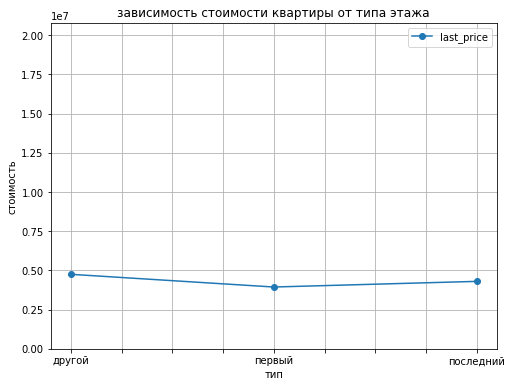

In [81]:
(
    df.pivot_table(index='floor_type', values='last_price', aggfunc='median')
      .plot(grid=True, figsize=(8, 6), style='o-')
)
# установка заголовка графика
plt.title('зависимость стоимости квартиры от типа этажа')
# добавление подписей осей
plt.xlabel('тип')
plt.ylabel('стоимость')
# установка диапазона оси у
plt.ylim (0, 20.800000e+06)
# показ графика
plt.show()

По графику видно, что явной корреляции между стоимостью и типом этажа нет. Стоимость этажей в ктегории "другой" чуть выше, но незначительно.

<font color= 'purple'> **дата размещения (день недели, месяц, год)**

Сразу построим сводную таблицу, которая будет отображать дату размещения по стоимости. Передим параметру values значение 'last_price', в aggfunc добавим медианное значение, которое не будет содержать выбросов, влияющих на результат. Из данных сводной таблицы построим график зависимости между стоимостью и количеством комнат.

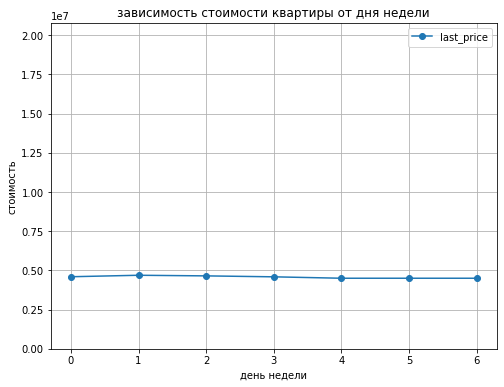

In [82]:
# зависимость стоимости от дня недели
(
    df.pivot_table(index='week_of_publication', values='last_price', aggfunc='median')
      .plot(grid=True, figsize=(8, 6), style='o-')
)
# установка заголовка графика
plt.title('зависимость стоимости квартиры от дня недели')
# добавление подписей осей
plt.xlabel('день недели')
plt.ylabel('стоимость')
# установка диапазона оси у
plt.ylim (0, 20.800000e+06)
# показ графика
plt.show()

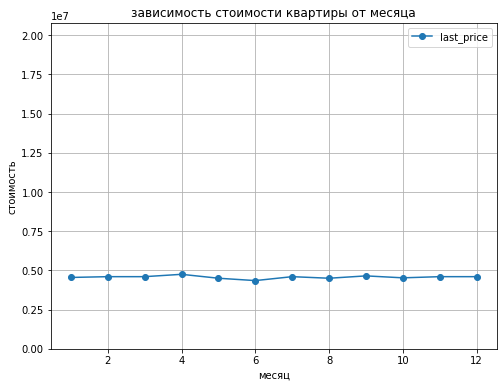

In [83]:
# зависимость стоимости от месяца
(
    df.pivot_table(index='month_of_publication', values='last_price', aggfunc='median')
      .plot(grid=True, figsize=(8, 6), style='o-')
)
# установка заголовка графика
plt.title('зависимость стоимости квартиры от месяца')
# добавление подписей осей
plt.xlabel('месяц')
plt.ylabel('стоимость')
# установка диапазона оси у
plt.ylim (0, 20.800000e+06)
# показ графика
plt.show()

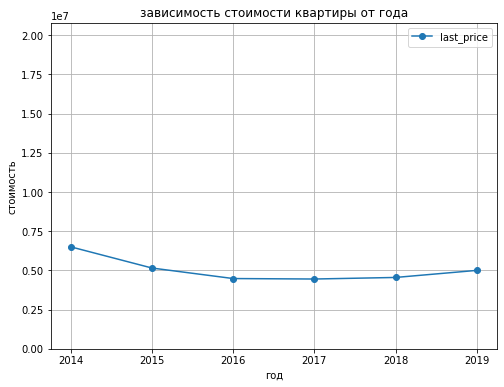

In [84]:
# зависимость стоимости от года
(
    df.pivot_table(index='year_of_publication', values='last_price', aggfunc='median')
      .plot(grid=True, figsize=(8, 6), style='o-')
)
# установка заголовка графика
plt.title('зависимость стоимости квартиры от года')
# добавление подписей осей
plt.xlabel('год')
plt.ylabel('стоимость')
# установка диапазона оси у
plt.ylim (0, 20.800000e+06)
# показ графика
plt.show()

Зависимость между стоимостью и датой размещения наблюдается слабая, даже лучше сказать, что ее нет: только стоимость квартиры  от года немного зависит (в 2014 стоимость была самой высокой, дальше снижалась, но не значительно)

**Вывод:** 

На графике заметно, что большее влияние на стоимость объекта оказывает:
* общая площадь квартиры: чем больше общая площадь, тем выше стоимость 
* количество комнат: чем больше комнат, тем выше цена

Слабая зависимость наблюдается между:

* стоимостью и годом публикации
* стоимостью и жилой площадью
* стоимостью и типом этажа: на первом и последнем этажах стоимость чуть меньше, чем на остальных.

Про остальные значения можно сказать, что прямой зависимости нет.

**4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:**

1) Выбираем 10 населённых пунктов с наибольшим числом объявлений.

In [85]:
# создадим переменню с 10 популярными городами с наибольшим числом объявлений 
popular_locality = df['locality_name'].value_counts().head(10)
popular_locality

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

2) Выводим среднюю цену за квадрат для 10 популярных городов.

In [86]:
# добавляем новую переменную, в значении которой будет срез, 
# в котором значения столбца locality_name равны индексам popular_locality
price_for_popular_locality = df.query('locality_name in @popular_locality.index')

# построим сводную таблицу, которая будет отображать популярный город и среднюю цену за квадрат 
# округлим значение the_price_of_one_square_meter
# остортируем таблицу по столбцу the_price_of_one_square_meter по убыванию
(
price_for_popular_locality.pivot_table(index='locality_name', values='the_price_of_one_square_meter').round(0)
                          .sort_values(by='the_price_of_one_square_meter', ascending=False) 
)


,the_price_of_one_square_meter
locality_name,
Санкт-Петербург,108694.0
Пушкин,101867.0
Кудрово,95325.0
Парголово,90332.0
Мурино,86088.0
Шушары,78677.0
Колпино,75333.0
Гатчина,68935.0
Всеволожск,67276.0


3) Добавим график для наглядности.

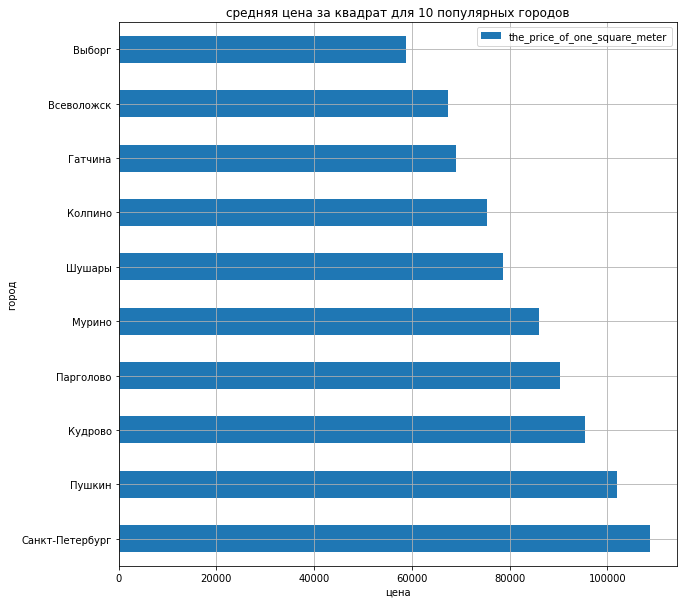

In [87]:
# Для анализа отдельных объектов, никак не связанных с ближайшими соседями, возьмем столбчатый график
(
price_for_popular_locality.pivot_table(index='locality_name', values='the_price_of_one_square_meter').round(0)
                          .sort_values(by='the_price_of_one_square_meter', ascending=False) 
                          .plot(grid=True, figsize=(10, 10), style='o-', kind='barh')
)
# установка заголовка графика
plt.title('средняя цена за квадрат для 10 популярных городов')
# добавление подписей осей
plt.xlabel('цена')
plt.ylabel('город')
# показ графика
plt.show()

**Вывод:**

Самая высокая стоимость квадратного метра в Санкт-Петербурге.

Самая низкая стоимость квадратного метра в Выборге.

В целом можно сказть, что города, ближайшие к Санкт-Петербургу, имеют большую цену за квадратный метр.

**5. Вычислим среднюю цену каждого километра в Санкт-Петербурге.**

In [88]:
# добавим срез, в котором значения столбца locality_name равно Санкт-Петербург
# построим сводную таблицу, которая будет отображать дистанцию до центра и среднюю цену 

(
    df.query('locality_name == "Санкт-Петербург"')
      .pivot_table(index='distance_to_the_center', values='last_price')
)

,last_price
distance_to_the_center,
0.0,1.019857e+07
1.0,1.044039e+07
2.0,9.965063e+06
3.0,9.048717e+06
4.0,9.334124e+06
5.0,9.382596e+06
6.0,8.583335e+06
7.0,7.931871e+06
8.0,7.865502e+06


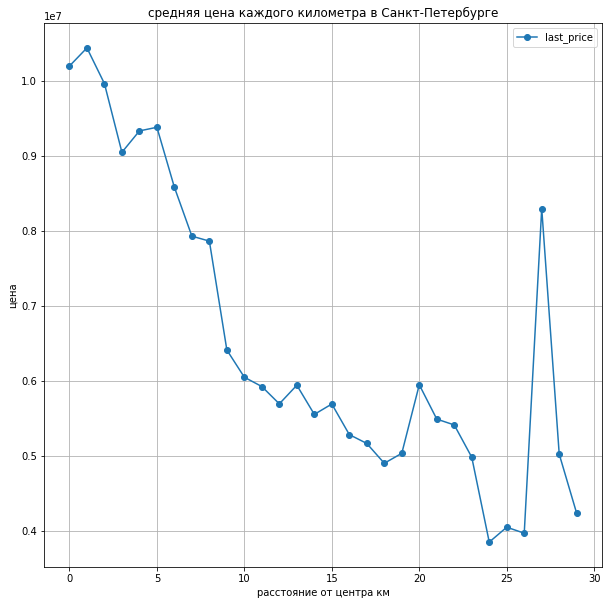

In [89]:
# добавим график для наглядности
(
    df.query('locality_name == "Санкт-Петербург"')
      .pivot_table(index='distance_to_the_center', values='last_price')
      .plot(grid=True, figsize=(10, 10), style='o-')
)
# установка заголовка графика
plt.title('средняя цена каждого километра в Санкт-Петербурге')
# добавление подписей осей
plt.xlabel('расстояние от центра км')
plt.ylabel('цена')
# показ графика
plt.show()

**Вывод:**

Результаты достаточно логичные: чем ближе расстояние к центру, тем больше цена. 

Начиная с 8 км и до 25 км цена сильно не разнится.  

Пик, который мы видим на 27 км может сигнализировать о том, что там может быть какое-то элитное жилье, а точка у 2.5 км может сигнализировать о том, что жилье там может быть в плохом состоянии.

# 5. Общий вывод

За время исследования нам удалось:

1. Изучить общую информацию по датафрейму и отметить ход работы.
2. Провести предобработку данных, а именно, переименовать название столбцов, заполнить пропуски в таблице, изменить тип данных, обработать явные и неявные дубликаты.
3. Добавить в таблицу новые столбцы.
4. Провести исследовательский анализ данных и выявить законмерности. О них чуть больше.

Анализ данных показал, что больше всего объявлений у квартир:
- однокомнатных и двухкомнатных, 
- чья общая площадь около 45 м2, жилая площадь 18 м2, кухня площадью 6, 8, 10 м2, 
- стоимостью от 3 млн. до 5,5 млн., 
- с потолками 2.65 и 2.5 м., 
- находящихся на 2 этаже в пятиэтажном или девятиэтажном доме, 
- с расстоянием от центра в диапазоне от 12000 до 16000 метров, от аэропорта в 15000-25000 м, от парка в 400-600 м., 
- размещенных в буднии дни и в феврале, марте, апреле, ноябре.

Далее удалось проанализировать, что большее количество объявлений висело меньше 100 дней (2-3 месяца), значит обычно большая часть квартир успевала уходить на продаважу в течение этого времени. Быстрыми продажами можно считать те объявления, которые висели около 45, а долгими более 232 дней.

Далее удалось выяснить, что большее влияние на стоимость объекта оказывает: 
- общая площадь квартиры (чем больше общая площадь, тем выше стоимость) и количество комнат (чем больше комнат, тем выше цена),
- год публикации, жилая площадь и тип этаца оказывают слабую зависимость,
- у остальных значения можно сказать, что прямой зависимости нет.

Анализ данных показал также то, что самая высокая стоимость квадратного метра в Санкт-Петербурге, а низкая стоимость квадратного метра в Выборге. Тоже и со стоимостью объектов в Санкт-Петербурге: они зависят от расстояния до центра города.В целом можно сказть, что города, ближайшие к Санкт-Петербургу, имеют большую цену за квадратный метр и квартиры, которые находся ближе к центру Санкт-Петербурга тоже стоят больше.

